In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.stats import pearsonr

In [82]:
import warnings
warnings.filterwarnings("ignore")

In [93]:
data = pd.read_csv("log.csv")
data.head()

,iteration,replication,neuroticismInfluence,socialInfluence,mathScoreInfluence,monthExchangeRate,mediaBias,womenSTEMPercentage,womenScience,menScience,womenNeuroticism,menNeuroticism,womenMathScoreAvg,menMathScoreAvg
0,1,1,0.1,0.1,0.1,6,0.5,0.521008,256.0,293.0,419.0,365.0,4.864516,5.339309
1,1,2,0.1,0.1,0.1,6,0.5,0.516588,289.0,261.0,389.0,346.0,5.196742,5.129235
2,1,3,0.1,0.1,0.1,6,0.5,0.481793,254.0,225.0,425.0,342.0,4.321871,5.044881
3,1,4,0.1,0.1,0.1,6,0.5,0.523546,253.0,230.0,449.0,342.0,4.582166,5.079365
4,1,5,0.1,0.1,0.1,6,0.5,0.534435,265.0,229.0,430.0,322.0,4.594148,5.000000


##   Neuroticism

Neuroticism is one of the fundamental dimensions of personality described by the Big Five model. It reflects an individual's tendency to experience negative emotions and emotional instability. People who score high on the neuroticism scale are more likely to feel anxious, sad, and moody. Women tend to develop higher neuroticism scores.

In [84]:
data[["womenNeuroticism", "menNeuroticism"]].mean()

womenNeuroticism    409.234580
menNeuroticism      356.376261
dtype: float64

##   Science Interest

In [85]:
data[["womenScience", "menScience"]].mean()

womenScience    237.804221
menScience      273.185959
dtype: float64

Let's see how this changes as __media bias__ changes

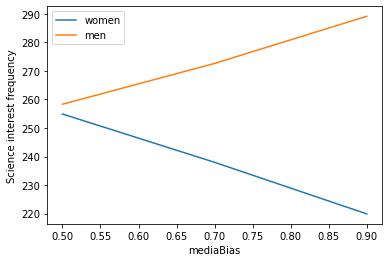

In [86]:
ax = data.groupby(["iteration"]).mean().groupby(["mediaBias"]).mean()["womenScience"].plot();
data.groupby(["iteration"]).mean().groupby(["mediaBias"]).mean()["menScience"].plot();
ax.set_ylabel("Science interest frequency");
ax.legend(["women", "men"]);

Interests also change as the __exchange rate changes__. Let's see how.

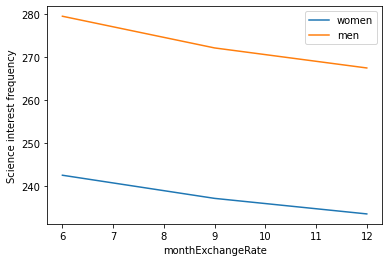

In [87]:
ax = data.groupby(["iteration"]).mean().groupby(["monthExchangeRate"]).mean()["womenScience"].plot();
data.groupby(["iteration"]).mean().groupby(["monthExchangeRate"]).mean()["menScience"].plot();
ax.set_ylabel("Science interest frequency");
ax.legend(["women", "men"]);

## Math Score

In the model, women exhibit a worse math score than men 

In [8]:
data[["womenMathScoreAvg", "menMathScoreAvg"]].mean()

womenMathScoreAvg    3.577618
menMathScoreAvg      3.906106
dtype: float64

In [27]:
data[["womenMathScoreAvg", "menMathScoreAvg"]].std()

womenMathScoreAvg    0.911046
menMathScoreAvg      1.003717
dtype: float64

This is partially due to the higher neuroticism scores and its reinforcing mechanism in learning. The other reason is the different interest in science. 

Let's see how math score changes based on mediaBias (influencing interests in men and women)

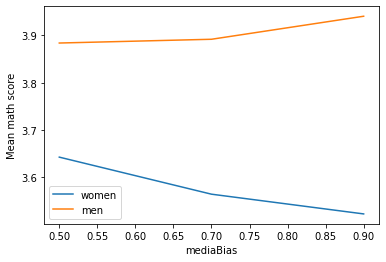

In [89]:
ax = data.groupby(["iteration"]).mean().groupby(["mediaBias"]).mean()["womenMathScoreAvg"].plot();
data.groupby(["iteration"]).mean().groupby(["mediaBias"]).mean()["menMathScoreAvg"].plot();
ax.set_ylabel("Mean math score");
ax.legend(["women", "men"]);

# it increasingly reduces for women, but stays quite stable for men. Probabily because it is balanced by the neuroticism factor, for which in men
# the reinforcing mechanism is way higher (way more frequent in the model)

##   STEM Career GAP

In [11]:
data.groupby(["iteration"]).mean()["womenSTEMPercentage"].mean()

0.4578713995497995

In [12]:
data_agg = data.groupby(["iteration"]).mean().drop(columns = "replication")
data_agg.head()

,neuroticismInfluence,socialInfluence,mathScoreInfluence,monthExchangeRate,mediaBias,womenSTEMPercentage,womenScience,menScience,womenNeuroticism,menNeuroticism,womenMathScoreAvg,menMathScoreAvg
iteration,,,,,,,,,,,,
1,0.1,0.1,0.1,6.0,0.5,0.495120,261.40,257.15,417.90,356.30,4.839238,5.149086
2,0.1,0.1,0.4,6.0,0.5,0.480929,255.00,270.95,410.10,349.65,4.885281,5.315298
3,0.1,0.1,0.7,6.0,0.5,0.488426,261.35,259.60,408.75,342.25,4.879698,5.220679
4,0.1,0.1,0.1,6.0,0.7,0.482004,245.65,279.75,406.00,341.80,4.821224,5.298633
5,0.1,0.1,0.4,6.0,0.7,0.463718,239.75,291.50,410.80,360.35,4.741199,5.195300


Let's see how this gap changes as our parameters do..

__Social Influence__

In [97]:
data_agg.groupby(["socialInfluence"]).mean()["womenSTEMPercentage"]

socialInfluence
0.1    0.466895
0.4    0.455484
0.7    0.450890
Name: womenSTEMPercentage, dtype: float64

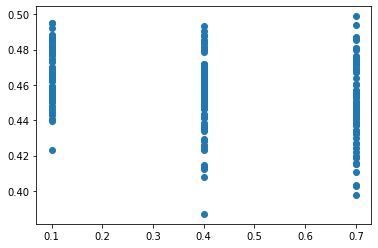

In [13]:
plt.scatter(data_agg["socialInfluence"], data_agg["womenSTEMPercentage"])

In [14]:
pearsonr(data_agg["socialInfluence"].values, data_agg["womenSTEMPercentage"].values)

PearsonRResult(statistic=-0.3165492284559992, pvalue=5.817678410649472e-07)

__Math Score Influence__

In [98]:
data_agg.groupby(["mathScoreInfluence"]).mean()["womenSTEMPercentage"]

mathScoreInfluence
0.1    0.448662
0.4    0.457568
0.7    0.467505
Name: womenSTEMPercentage, dtype: float64

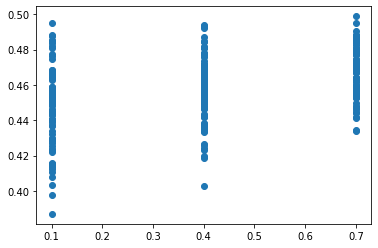

In [15]:
plt.scatter(data_agg["mathScoreInfluence"], data_agg["womenSTEMPercentage"])

In [16]:
pearsonr(data_agg["mathScoreInfluence"].values, data_agg["womenSTEMPercentage"].values)

PearsonRResult(statistic=0.3725328596877547, pvalue=2.775183772276129e-09)

__Neuroticism Influence__

In [99]:
data_agg.groupby(["neuroticismInfluence"]).mean()["womenSTEMPercentage"]

neuroticismInfluence
0.1    0.469172
0.4    0.456316
0.7    0.447621
Name: womenSTEMPercentage, dtype: float64

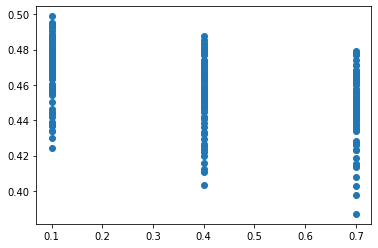

In [17]:
plt.scatter(data_agg["neuroticismInfluence"], data_agg["womenSTEMPercentage"])

In [18]:
pearsonr(data_agg["neuroticismInfluence"].values, data_agg["womenSTEMPercentage"].values)

PearsonRResult(statistic=-0.4253816107120431, pvalue=6.379296915502973e-12)

__Media bias__

In [101]:
data_agg.groupby(["mediaBias"]).mean()["womenSTEMPercentage"]

mediaBias
0.5    0.472892
0.7    0.458371
0.9    0.441761
Name: womenSTEMPercentage, dtype: float64

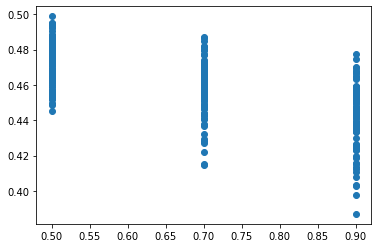

In [19]:
plt.scatter(data_agg["mediaBias"], data_agg["womenSTEMPercentage"])

In [20]:
pearsonr(data_agg["mediaBias"].values, data_agg["womenSTEMPercentage"].values)

PearsonRResult(statistic=-0.6151982864346751, pvalue=2.802234624914734e-26)

__Exchange rate__

In [102]:
data_agg.groupby(["monthExchangeRate"]).mean()["womenSTEMPercentage"]

monthExchangeRate
6.0     0.453726
9.0     0.458561
12.0    0.461507
Name: womenSTEMPercentage, dtype: float64

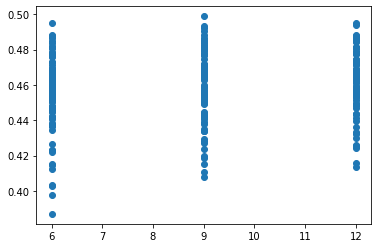

In [21]:
plt.scatter(data_agg["monthExchangeRate"], data_agg["womenSTEMPercentage"])

In [22]:
pearsonr(data_agg["monthExchangeRate"].values, data_agg["womenSTEMPercentage"].values)

PearsonRResult(statistic=0.15364847112055863, pvalue=0.017452845163257943)

Each parameter is giving its contribution. But it is their combination that changes things..

__Scenario 1__: Let's, for example, fix a high neuroticism influence combined with a low social exchange and high media bias in favour of men 

In [28]:
data = data.groupby(["iteration"]).mean()

In [34]:
scenario_1 = data_agg[(data_agg.neuroticismInfluence ==  0.7) & (data_agg.mediaBias ==  0.9)]
scenario_1["womenSTEMPercentage"].mean()

0.43216934585836847

__Scenario 2__: Let's, instead, consider a lower bias not to choose STEM if interested in social aspects. Even if we keep media hugely biased..

In [42]:
scenario_2 = data_agg[(data_agg.mediaBias ==  0.9) & (data_agg.socialInfluence ==  0.1)  & (data_agg.neuroticismInfluence ==  0.7)]
scenario_2["womenSTEMPercentage"].mean()
# the gap is a bit reduced 

0.44795479130880345

__Scenario 3__: if we encourage social exchange..

In [73]:
scenario_3 = data_agg[(data_agg.mediaBias ==  0.9) & (data_agg.socialInfluence ==  0.1)  & (data_agg.neuroticismInfluence ==  0.7) & (data_agg.monthExchangeRate == 6)]
scenario_3["womenSTEMPercentage"].mean()
# the gap is a bit reduced 

0.4413831033157107

__Scenario 4:__ With a bit of work on media..

In [80]:
scenario_4 = data_agg[(data_agg.mediaBias ==  0.7) & (data_agg.socialInfluence ==  0.1) & (data_agg.monthExchangeRate == 6)]
scenario_4["womenSTEMPercentage"].mean()
# the gap is a bit reduced 

0.4611034002664012